In [21]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import signal
import random

import h5py
from IPython.utils import io

In [2]:
from joblib import Parallel, delayed
from tqdm import tqdm

In [3]:
import sys
sys.path.append('../../../../nadavp/new_trap/Tools/')
sys.path.append('../../../../nadavp/new_trap/Tools/StatFramework/')
import BeadDataFile
from discharge_tools import *

In [4]:
from likelihood_calculator import likelihood_analyser
from likelihood_calculator import GravityFramework
from likelihood_calculator import auxiliary_functions as aux
gfw = GravityFramework.GravityFramework()

sys.path.append('/home/analysis_user/New_trap_code/SensitivityFramework/')
from signal_model_utilities import *

In [5]:
%matplotlib widget

In [6]:
%reload_ext autoreload
%autoreload 2

In [7]:
391-375-7.6/2+1

13.2

In [8]:
## force template
dist = 11.4
z_sep = -15.85
y_offset = 4.9
test_shaking378 = force_vs_time(dist*1e-6,z_sep*1e-6,200e-6,3,"z",10e-6, yuk_or_grav="yuk",offset_y=y_offset*1e-6, 
                     alpha=1e8, bead_size=3.8e-6)

Your choice of separation or height is not existing
Taking 3.8e-06 for bead_size
Taking 1.2e-05 for separation
Taking -1.5e-05 for height
order
A bead size of 3.80e-06 is selected
3.8e-06
3.8e-06
A bead size of 3.80e-06 is selected
3.8e-06
posvec
A bead size of 3.80e-06 is selected
3.8e-06
A separation of 1.15e-05 is selected
A height of -1.50e-05 is selected


In [46]:
## likelihood calculator stuff
ll = likelihood_analyser.LikelihoodAnalyser()
shaking378_template = np.array(test_shaking378[1])*1.85/1.55
gravity_freqs = np.array([36, 33, 24, 18, 9])
# gravity_freqs = 3*np.array([12, 11, 4, 6, 7])
bandwidth = 2
# gravity_freqs = np.array([36])
# gravity_freqs = np.array([12, 33, 39])

In [10]:
bdf_discharge = load_dir(dirname='/data/new_trap/20200320/Bead1/Discharge/Discharge_after_Mass_20200402/After_spinning_again_20200403/',
                         start_file=230, max_file=40)
bdf_z = bdf_discharge[5:35]

530  files in folder
40  files loaded


In [11]:
fname = r'/data/new_trap/20200320/Bead1/TransFunc/Repeat_TransFunc_20200104/TransFunc_X_m300k_250s_1hz.h5'
tf_x = BeadDataFile.BeadDataFile(fname)
fname = r'/data/new_trap/20200320/Bead1/TransFunc/Repeat_TransFunc_20200104/TransFunc_Y_m300k_250s_1hz.h5'
tf_y = BeadDataFile.BeadDataFile(fname)
fname = r'/data/new_trap/20200320/Bead1/TransFunc/Repeat_TransFunc_20200104/TransFunc_Z_m300k_250s_1hz.h5'
tf_z = BeadDataFile.BeadDataFile(fname)
gfw.build_transfer_function([tf_x, tf_y, tf_z], base_freq=1, number_of_harmonics=90, scale_freq=71, plot=False)

No height data
No cantilever data
Error loading spinning data
No laser power data
No height data
No cantilever data
Error loading spinning data
No laser power data
No height data
No cantilever data
Error loading spinning data
No laser power data


In [12]:
m1_zscale = gfw.build_z_response(bdf_z, drive_freq=71, charges=6, bandwidth=bandwidth, decimate=10)

***************************************************
Z2-amplitude:  2.69e+02
reduced chi2:  288.98586212705186
***************************************************
Z2-amplitude:  2.60e+02
reduced chi2:  658.9340028864549
***************************************************
Z2-amplitude:  2.74e+02
reduced chi2:  486.49073911245125
***************************************************
Z2-amplitude:  2.78e+02
reduced chi2:  662.0476432309312
***************************************************
Z2-amplitude:  2.80e+02
reduced chi2:  581.29439966364
***************************************************
Z2-amplitude:  2.74e+02
reduced chi2:  610.1516298108376
***************************************************
Z2-amplitude:  2.70e+02
reduced chi2:  341.72862648819574
***************************************************
Z2-amplitude:  2.66e+02
reduced chi2:  319.23470715664763
***************************************************
Z2-amplitude:  2.66e+02
reduced chi2:  482.87048405227034
****************

### NoShaking data

In [13]:
## 1000 files of shaking data for nose floor
data_bdfs2 = load_dir(dirname='/data/new_trap/20200320/Bead1/Shaking/Shaking2_20200403/',
                         file_prefix='NoShaking_1', start_file=0, max_file=100)

6905  files in folder
100  files loaded


In [47]:
gravity_scales = np.array([gfw.scale_Z2])* np.interp(gravity_freqs, gfw.tf_freq, gfw.tf_ffts[2])

In [48]:
gravity_freqs2 = gravity_freqs

In [50]:
phases_freqs_z = []
ffts_freqs_z = []

phases_freqs_x = []
ffts_freqs_x = []

for i in range(10000):
    std_freqs_tmp = []
    print(i, '**************')
    fname = r'/data/new_trap/20200320/Bead1/Shaking/Shaking378/Shaking3_'+str(i)+'.h5'
#     fname = r'/data/new_trap/20200320/Bead1/Shaking/Shaking2_20200403/NoShaking_1_'+str(i)+'.h5'
    bb = BeadDataFile.BeadDataFile(fname=fname)
    freq = np.fft.rfftfreq(len(bb.z2), 1 / 5000)
    fft_tmp = bb.psd2('z')[1]
    ffts_freqs_tmp = np.array([fft_tmp[freq == freq_] for freq_ in gravity_freqs2])    
    ffts_freqs_z.append(ffts_freqs_tmp)
    
ffts_freqs_z = np.array(ffts_freqs_z)

0 **************
1 **************
2 **************
3 **************
4 **************
5 **************
6 **************
7 **************
8 **************
9 **************
10 **************
11 **************
12 **************
13 **************
14 **************
15 **************
16 **************
17 **************
18 **************
19 **************
20 **************
21 **************
22 **************
23 **************
24 **************
25 **************
26 **************
27 **************
28 **************
29 **************
30 **************
31 **************
32 **************
33 **************
34 **************
35 **************
36 **************
37 **************
38 **************
39 **************
40 **************
41 **************
42 **************
43 **************
44 **************
45 **************
46 **************
47 **************
48 **************
49 **************
50 **************
51 **************
52 **************
53 **************
54 **************
55 **************
56

438 **************
439 **************
440 **************
441 **************
442 **************
443 **************
444 **************
445 **************
446 **************
447 **************
448 **************
449 **************
450 **************
451 **************
452 **************
453 **************
454 **************
455 **************
456 **************
457 **************
458 **************
459 **************
460 **************
461 **************
462 **************
463 **************
464 **************
465 **************
466 **************
467 **************
468 **************
469 **************
470 **************
471 **************
472 **************
473 **************
474 **************
475 **************
476 **************
477 **************
478 **************
479 **************
480 **************
481 **************
482 **************
483 **************
484 **************
485 **************
486 **************
487 **************
488 **************
489 **************
490 ********

872 **************
873 **************
874 **************
875 **************
876 **************
877 **************
878 **************
879 **************
880 **************
881 **************
882 **************
883 **************
884 **************
885 **************
886 **************
887 **************
888 **************
889 **************
890 **************
891 **************
892 **************
893 **************
894 **************
895 **************
896 **************
897 **************
898 **************
899 **************
900 **************
901 **************
902 **************
903 **************
904 **************
905 **************
906 **************
907 **************
908 **************
909 **************
910 **************
911 **************
912 **************
913 **************
914 **************
915 **************
916 **************
917 **************
918 **************
919 **************
920 **************
921 **************
922 **************
923 **************
924 ********

1289 **************
1290 **************
1291 **************
1292 **************
1293 **************
1294 **************
1295 **************
1296 **************
1297 **************
1298 **************
1299 **************
1300 **************
1301 **************
1302 **************
1303 **************
1304 **************
1305 **************
1306 **************
1307 **************
1308 **************
1309 **************
1310 **************
1311 **************
1312 **************
1313 **************
1314 **************
1315 **************
1316 **************
1317 **************
1318 **************
1319 **************
1320 **************
1321 **************
1322 **************
1323 **************
1324 **************
1325 **************
1326 **************
1327 **************
1328 **************
1329 **************
1330 **************
1331 **************
1332 **************
1333 **************
1334 **************
1335 **************
1336 **************
1337 **************
1338 **************


1701 **************
1702 **************
1703 **************
1704 **************
1705 **************
1706 **************
1707 **************
1708 **************
1709 **************
1710 **************
1711 **************
1712 **************
1713 **************
1714 **************
1715 **************
1716 **************
1717 **************
1718 **************
1719 **************
1720 **************
1721 **************
1722 **************
1723 **************
1724 **************
1725 **************
1726 **************
1727 **************
1728 **************
1729 **************
1730 **************
1731 **************
1732 **************
1733 **************
1734 **************
1735 **************
1736 **************
1737 **************
1738 **************
1739 **************
1740 **************
1741 **************
1742 **************
1743 **************
1744 **************
1745 **************
1746 **************
1747 **************
1748 **************
1749 **************
1750 **************


2111 **************
2112 **************
2113 **************
2114 **************
2115 **************
2116 **************
2117 **************
2118 **************
2119 **************
2120 **************
2121 **************
2122 **************
2123 **************
2124 **************
2125 **************
2126 **************
2127 **************
2128 **************
2129 **************
2130 **************
2131 **************
2132 **************
2133 **************
2134 **************
2135 **************
2136 **************
2137 **************
2138 **************
2139 **************
2140 **************
2141 **************
2142 **************
2143 **************
2144 **************
2145 **************
2146 **************
2147 **************
2148 **************
2149 **************
2150 **************
2151 **************
2152 **************
2153 **************
2154 **************
2155 **************
2156 **************
2157 **************
2158 **************
2159 **************
2160 **************


2525 **************
2526 **************
2527 **************
2528 **************
2529 **************
2530 **************
2531 **************
2532 **************
2533 **************
2534 **************
2535 **************
2536 **************
2537 **************
2538 **************
2539 **************
2540 **************
2541 **************
2542 **************
2543 **************
2544 **************
2545 **************
2546 **************
2547 **************
2548 **************
2549 **************
2550 **************
2551 **************
2552 **************
2553 **************
2554 **************
2555 **************
2556 **************
2557 **************
2558 **************
2559 **************
2560 **************
2561 **************
2562 **************
2563 **************
2564 **************
2565 **************
2566 **************
2567 **************
2568 **************
2569 **************
2570 **************
2571 **************
2572 **************
2573 **************
2574 **************


2938 **************
2939 **************
2940 **************
2941 **************
2942 **************
2943 **************
2944 **************
2945 **************
2946 **************
2947 **************
2948 **************
2949 **************
2950 **************
2951 **************
2952 **************
2953 **************
2954 **************
2955 **************
2956 **************
2957 **************
2958 **************
2959 **************
2960 **************
2961 **************
2962 **************
2963 **************
2964 **************
2965 **************
2966 **************
2967 **************
2968 **************
2969 **************
2970 **************
2971 **************
2972 **************
2973 **************
2974 **************
2975 **************
2976 **************
2977 **************
2978 **************
2979 **************
2980 **************
2981 **************
2982 **************
2983 **************
2984 **************
2985 **************
2986 **************
2987 **************


3350 **************
3351 **************
3352 **************
3353 **************
3354 **************
3355 **************
3356 **************
3357 **************
3358 **************
3359 **************
3360 **************
3361 **************
3362 **************
3363 **************
3364 **************
3365 **************
3366 **************
3367 **************
3368 **************
3369 **************
3370 **************
3371 **************
3372 **************
3373 **************
3374 **************
3375 **************
3376 **************
3377 **************
3378 **************
3379 **************
3380 **************
3381 **************
3382 **************
3383 **************
3384 **************
3385 **************
3386 **************
3387 **************
3388 **************
3389 **************
3390 **************
3391 **************
3392 **************
3393 **************
3394 **************
3395 **************
3396 **************
3397 **************
3398 **************
3399 **************


3762 **************
3763 **************
3764 **************
3765 **************
3766 **************
3767 **************
3768 **************
3769 **************
3770 **************
3771 **************
3772 **************
3773 **************
3774 **************
3775 **************
3776 **************
3777 **************
3778 **************
3779 **************
3780 **************
3781 **************
3782 **************
3783 **************
3784 **************
3785 **************
3786 **************
3787 **************
3788 **************
3789 **************
3790 **************
3791 **************
3792 **************
3793 **************
3794 **************
3795 **************
3796 **************
3797 **************
3798 **************
3799 **************
3800 **************
3801 **************
3802 **************
3803 **************
3804 **************
3805 **************
3806 **************
3807 **************
3808 **************
3809 **************
3810 **************
3811 **************


4174 **************
4175 **************
4176 **************
4177 **************
4178 **************
4179 **************
4180 **************
4181 **************
4182 **************
4183 **************
4184 **************
4185 **************
4186 **************
4187 **************
4188 **************
4189 **************
4190 **************
4191 **************
4192 **************
4193 **************
4194 **************
4195 **************
4196 **************
4197 **************
4198 **************
4199 **************
4200 **************
4201 **************
4202 **************
4203 **************
4204 **************
4205 **************
4206 **************
4207 **************
4208 **************
4209 **************
4210 **************
4211 **************
4212 **************
4213 **************
4214 **************
4215 **************
4216 **************
4217 **************
4218 **************
4219 **************
4220 **************
4221 **************
4222 **************
4223 **************


4585 **************
4586 **************
4587 **************
4588 **************
4589 **************
4590 **************
4591 **************
4592 **************
4593 **************
4594 **************
4595 **************
4596 **************
4597 **************
4598 **************
4599 **************
4600 **************
4601 **************
4602 **************
4603 **************
4604 **************
4605 **************
4606 **************
4607 **************
4608 **************
4609 **************
4610 **************
4611 **************
4612 **************
4613 **************
4614 **************
4615 **************
4616 **************
4617 **************
4618 **************
4619 **************
4620 **************
4621 **************
4622 **************
4623 **************
4624 **************
4625 **************
4626 **************
4627 **************
4628 **************
4629 **************
4630 **************
4631 **************
4632 **************
4633 **************
4634 **************


4996 **************
4997 **************
4998 **************
4999 **************
5000 **************
5001 **************
5002 **************
5003 **************
5004 **************
5005 **************
5006 **************
5007 **************
5008 **************
5009 **************
5010 **************
5011 **************
5012 **************
5013 **************
5014 **************
5015 **************
5016 **************
5017 **************
5018 **************
5019 **************
5020 **************
5021 **************
5022 **************
5023 **************
5024 **************
5025 **************
5026 **************
5027 **************
5028 **************
5029 **************
5030 **************
5031 **************
5032 **************
5033 **************
5034 **************
5035 **************
5036 **************
5037 **************
5038 **************
5039 **************
5040 **************
5041 **************
5042 **************
5043 **************
5044 **************
5045 **************


5409 **************
5410 **************
5411 **************
5412 **************
5413 **************
5414 **************
5415 **************
5416 **************
5417 **************
5418 **************
5419 **************
5420 **************
5421 **************
5422 **************
5423 **************
5424 **************
5425 **************
5426 **************
5427 **************
5428 **************
5429 **************
5430 **************
5431 **************
5432 **************
5433 **************
5434 **************
5435 **************
5436 **************
5437 **************
5438 **************
5439 **************
5440 **************
5441 **************
5442 **************
5443 **************
5444 **************
5445 **************
5446 **************
5447 **************
5448 **************
5449 **************
5450 **************
5451 **************
5452 **************
5453 **************
5454 **************
5455 **************
5456 **************
5457 **************
5458 **************


5822 **************
5823 **************
5824 **************
5825 **************
5826 **************
5827 **************
5828 **************
5829 **************
5830 **************
5831 **************
5832 **************
5833 **************
5834 **************
5835 **************
5836 **************
5837 **************
5838 **************
5839 **************
5840 **************
5841 **************
5842 **************
5843 **************
5844 **************
5845 **************
5846 **************
5847 **************
5848 **************
5849 **************
5850 **************
5851 **************
5852 **************
5853 **************
5854 **************
5855 **************
5856 **************
5857 **************
5858 **************
5859 **************
5860 **************
5861 **************
5862 **************
5863 **************
5864 **************
5865 **************
5866 **************
5867 **************
5868 **************
5869 **************
5870 **************
5871 **************


6233 **************
6234 **************
6235 **************
6236 **************
6237 **************
6238 **************
6239 **************
6240 **************
6241 **************
6242 **************
6243 **************
6244 **************
6245 **************
6246 **************
6247 **************
6248 **************
6249 **************
6250 **************
6251 **************
6252 **************
6253 **************
6254 **************
6255 **************
6256 **************
6257 **************
6258 **************
6259 **************
6260 **************
6261 **************
6262 **************
6263 **************
6264 **************
6265 **************
6266 **************
6267 **************
6268 **************
6269 **************
6270 **************
6271 **************
6272 **************
6273 **************
6274 **************
6275 **************
6276 **************
6277 **************
6278 **************
6279 **************
6280 **************
6281 **************
6282 **************


6644 **************
6645 **************
6646 **************
6647 **************
6648 **************
6649 **************
6650 **************
6651 **************
6652 **************
6653 **************
6654 **************
6655 **************
6656 **************
6657 **************
6658 **************
6659 **************
6660 **************
6661 **************
6662 **************
6663 **************
6664 **************
6665 **************
6666 **************
6667 **************
6668 **************
6669 **************
6670 **************
6671 **************
6672 **************
6673 **************
6674 **************
6675 **************
6676 **************
6677 **************
6678 **************
6679 **************
6680 **************
6681 **************
6682 **************
6683 **************
6684 **************
6685 **************
6686 **************
6687 **************
6688 **************
6689 **************
6690 **************
6691 **************
6692 **************
6693 **************


7056 **************
7057 **************
7058 **************
7059 **************
7060 **************
7061 **************
7062 **************
7063 **************
7064 **************
7065 **************
7066 **************
7067 **************
7068 **************
7069 **************
7070 **************
7071 **************
7072 **************
7073 **************
7074 **************
7075 **************
7076 **************
7077 **************
7078 **************
7079 **************
7080 **************
7081 **************
7082 **************
7083 **************
7084 **************
7085 **************
7086 **************
7087 **************
7088 **************
7089 **************
7090 **************
7091 **************
7092 **************
7093 **************
7094 **************
7095 **************
7096 **************
7097 **************
7098 **************
7099 **************
7100 **************
7101 **************
7102 **************
7103 **************
7104 **************
7105 **************


7466 **************
7467 **************
7468 **************
7469 **************
7470 **************
7471 **************
7472 **************
7473 **************
7474 **************
7475 **************
7476 **************
7477 **************
7478 **************
7479 **************
7480 **************
7481 **************
7482 **************
7483 **************
7484 **************
7485 **************
7486 **************
7487 **************
7488 **************
7489 **************
7490 **************
7491 **************
7492 **************
7493 **************
7494 **************
7495 **************
7496 **************
7497 **************
7498 **************
7499 **************
7500 **************
7501 **************
7502 **************
7503 **************
7504 **************
7505 **************
7506 **************
7507 **************
7508 **************
7509 **************
7510 **************
7511 **************
7512 **************
7513 **************
7514 **************
7515 **************


7879 **************
7880 **************
7881 **************
7882 **************
7883 **************
7884 **************
7885 **************
7886 **************
7887 **************
7888 **************
7889 **************
7890 **************
7891 **************
7892 **************
7893 **************
7894 **************
7895 **************
7896 **************
7897 **************
7898 **************
7899 **************
7900 **************
7901 **************
7902 **************
7903 **************
7904 **************
7905 **************
7906 **************
7907 **************
7908 **************
7909 **************
7910 **************
7911 **************
7912 **************
7913 **************
7914 **************
7915 **************
7916 **************
7917 **************
7918 **************
7919 **************
7920 **************
7921 **************
7922 **************
7923 **************
7924 **************
7925 **************
7926 **************
7927 **************
7928 **************


8293 **************
8294 **************
8295 **************
8296 **************
8297 **************
8298 **************
8299 **************
8300 **************
8301 **************
8302 **************
8303 **************
8304 **************
8305 **************
8306 **************
8307 **************
8308 **************
8309 **************
8310 **************
8311 **************
8312 **************
8313 **************
8314 **************
8315 **************
8316 **************
8317 **************
8318 **************
8319 **************
8320 **************
8321 **************
8322 **************
8323 **************
8324 **************
8325 **************
8326 **************
8327 **************
8328 **************
8329 **************
8330 **************
8331 **************
8332 **************
8333 **************
8334 **************
8335 **************
8336 **************
8337 **************
8338 **************
8339 **************
8340 **************
8341 **************
8342 **************


8707 **************
8708 **************
8709 **************
8710 **************
8711 **************
8712 **************
8713 **************
8714 **************
8715 **************
8716 **************
8717 **************
8718 **************
8719 **************
8720 **************
8721 **************
8722 **************
8723 **************
8724 **************
8725 **************
8726 **************
8727 **************
8728 **************
8729 **************
8730 **************
8731 **************
8732 **************
8733 **************
8734 **************
8735 **************
8736 **************
8737 **************
8738 **************
8739 **************
8740 **************
8741 **************
8742 **************
8743 **************
8744 **************
8745 **************
8746 **************
8747 **************
8748 **************
8749 **************
8750 **************
8751 **************
8752 **************
8753 **************
8754 **************
8755 **************
8756 **************


9118 **************
9119 **************
9120 **************
9121 **************
9122 **************
9123 **************
9124 **************
9125 **************
9126 **************
9127 **************
9128 **************
9129 **************
9130 **************
9131 **************
9132 **************
9133 **************
9134 **************
9135 **************
9136 **************
9137 **************
9138 **************
9139 **************
9140 **************
9141 **************
9142 **************
9143 **************
9144 **************
9145 **************
9146 **************
9147 **************
9148 **************
9149 **************
9150 **************
9151 **************
9152 **************
9153 **************
9154 **************
9155 **************
9156 **************
9157 **************
9158 **************
9159 **************
9160 **************
9161 **************
9162 **************
9163 **************
9164 **************
9165 **************
9166 **************
9167 **************


9529 **************
9530 **************
9531 **************
9532 **************
9533 **************
9534 **************
9535 **************
9536 **************
9537 **************
9538 **************
9539 **************
9540 **************
9541 **************
9542 **************
9543 **************
9544 **************
9545 **************
9546 **************
9547 **************
9548 **************
9549 **************
9550 **************
9551 **************
9552 **************
9553 **************
9554 **************
9555 **************
9556 **************
9557 **************
9558 **************
9559 **************
9560 **************
9561 **************
9562 **************
9563 **************
9564 **************
9565 **************
9566 **************
9567 **************
9568 **************
9569 **************
9570 **************
9571 **************
9572 **************
9573 **************
9574 **************
9575 **************
9576 **************
9577 **************
9578 **************


9943 **************
9944 **************
9945 **************
9946 **************
9947 **************
9948 **************
9949 **************
9950 **************
9951 **************
9952 **************
9953 **************
9954 **************
9955 **************
9956 **************
9957 **************
9958 **************
9959 **************
9960 **************
9961 **************
9962 **************
9963 **************
9964 **************
9965 **************
9966 **************
9967 **************
9968 **************
9969 **************
9970 **************
9971 **************
9972 **************
9973 **************
9974 **************
9975 **************
9976 **************
9977 **************
9978 **************
9979 **************
9980 **************
9981 **************
9982 **************
9983 **************
9984 **************
9985 **************
9986 **************
9987 **************
9988 **************
9989 **************
9990 **************
9991 **************
9992 **************


In [17]:
noises = []
for freq_ in gravity_freqs2:
    noises.append(np.std(data_bdfs2[0].response_at_freq2('z', drive_freq=freq_, bandwidth=2)))
noises = noises/np.max(noises)

In [49]:
noises = []
noises_std =[]
for freq_ in gravity_freqs2:
    tmp_list = []
    for bb in data_bdfs2:
        tmp_list.append(np.std(bb.response_at_freq2('z', drive_freq=freq_, bandwidth=2)))
    noises.append(np.mean(tmp_list))
    noises_std.append(np.std(tmp_list))
# noises = noises
noises_std = np.array(noises_std)

In [50]:
noises_std, gravity_freqs

(array([ 4.85838303,  5.37130045,  8.30817956, 12.35915943, 28.03812742]),
 array([36, 33, 24, 18,  9]))

In [15]:
noises_std.shape

(15,)

In [19]:
mms = []

for i in range(8):
    print(i, sep='...')
    scales = gravity_scales[:i+1]
    signal_freqs = gravity_freqs[:i+1]
    fit_kwargs = {'A': 0, 'phi': 0.2,
                  'error_A': 0.1, 'error_phi': 0.5, 'errordef': 1,
                  'limit_phi': [0, 2 * np.pi],
                  'limit_A': [-1000, 1000],
                  'print_level': 0, 'fix_A': False, 'fix_phi': True}

    mm = []
    for bdf_ in data_bdfs2:
        mm.append(ll.find_mle_multiHarmoincs(x=bdf_.z2, template=shaking378_template, scales=scales, 
                                             signal_freqs=signal_freqs, 
                                         bandwidth=2, decimate=10, **fit_kwargs).values[0])
    mms.append(mm)

0
1
2
3
4
5
6
7


<IPython.core.display.Javascript object>


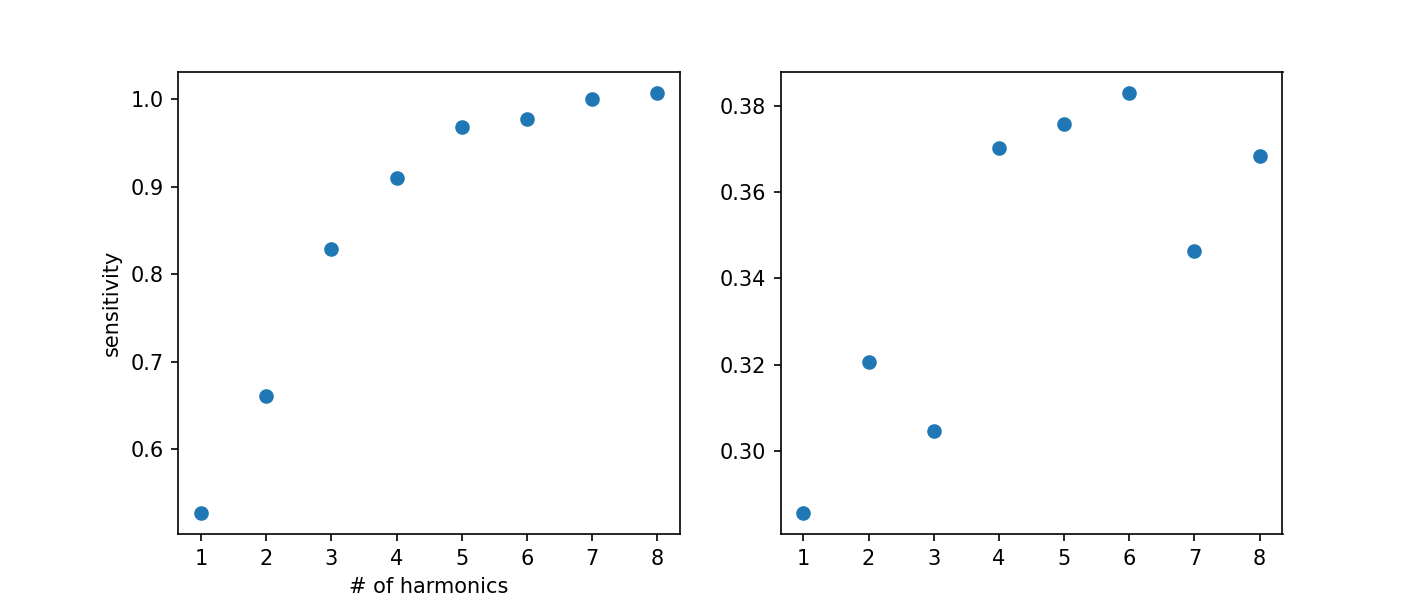

[Text(0, 0.5, 'sensitivity'), Text(0.5, 0, '# of harmonics')]

In [21]:
mm_std = np.array([np.std(mm_) for mm_ in mms])
mm_mean = [np.mean(mm_) for mm_ in mms]
_,ax = plt.subplots(1,2,figsize=(9.5,4))
ax[0].scatter(range(1,9), (1/mm_std)*mm_std[6])
ax[1].scatter(range(1,9), mm_mean)
ax[0].set(xlabel='# of harmonics', ylabel='sensitivity')

In [15]:
def func3(i):
    j=12 ## harmonic
    print(i,'  ******************')
    fname = r'/data/new_trap/20200320/Bead1/Shaking/Shaking378/Shaking3_'+str(i)+'.h5'
    bb = BeadDataFile.BeadDataFile(fname=fname)

    fit_kwargs = {'A': 0, 'phi': 0.2, 'sigma':13.85,
              'error_A': 1, 'error_phi': 0.5, 'errordef': 1, 'error_sigma': 10,
              'limit_phi': [0, 2 * np.pi],
              'limit_A': [-1000, 1000], 'limit_sigma': [0, 1000000],
              'print_level': 0, 'fix_A': False, 'fix_phi': True, 'fix_sigma': False}
#     noises_array = np.array([1])
    mm_tmp2 = gfw.get_alpha_mle_multiHarmonics(bdf=bb, freqs_array=[gravity_freqs[j]], noise_array=noises_array/noises_array[0], 
                                               bandwidth=1, decimate=10, 
                                               x_focous=392.4, y_focous=437.3, lambda_par=0.0001,
                                      height=z_sep*1e-6, suppress_print=True, large_bead=True, **fit_kwargs)
    best_alpha = mm_tmp2[0]
    print(best_alpha)
    return best_alpha



In [22]:
bb = map(func3, range(10))

In [25]:
print(bb[0])

TypeError: 'map' object is not subscriptable

In [48]:
def func3(i):
    print(i,'  ******************')
    fname = r'/data/new_trap/20200320/Bead1/Shaking/Shaking378/Shaking3_'+str(i)+'.h5'
    bb = BeadDataFile.BeadDataFile(fname=fname)

    fit_kwargs = {'A': 0, 'phi': 0.2, 'sigma':13.85,
              'error_A': 1, 'error_phi': 0.5, 'errordef': 1, 'error_sigma': 10,
              'limit_phi': [0, 2 * np.pi],
              'limit_A': [-1000, 1000], 'limit_sigma': [0, 1000000],
              'print_level': 0, 'fix_A': False, 'fix_phi': True, 'fix_sigma': False}
    mm_tmp2 = gfw.get_alpha_mle_multiHarmonics(bdf=bb, freqs_array=gravity_freqs, noise_array=noises_std/noises_std[0], 
                                               bandwidth=bandwidth, decimate=10, 
                                               x_focous=392.4, y_focous=437.3, lambda_par=0.0001,
                                      height=z_sep*1e-6, suppress_print=True, large_bead=True, **fit_kwargs)
    best_alpha = np.array(mm_tmp2[0])
    return best_alpha

In [29]:
test_mle = np.array(Parallel(n_jobs=40)(delayed(func3)(i) for i in tqdm(range(100))))

100%|██████████| 100/100 [00:00<00:00, 122.11it/s]


PicklingError: Could not pickle the task to send it to the workers.

In [21]:
alpha_MLEs_As = [m1_.values[0] for m1_ in m1_all]
sig_MLEs_As = [m1_.values[2] for m1_ in m1_all]
np.mean(alpha_MLEs_As), np.std(alpha_MLEs_As), np.std(alpha_MLEs_As)/np.sqrt(100)

(-0.4352624055869251, 15.183841226558453, 1.5183841226558452)

In [60]:
fname = r'/data/new_trap/20200320/Bead1/Shaking/Grid/Shaking378_58_0.h5'
bb = BeadDataFile.BeadDataFile(fname=fname)
np.std(bb.cant_pos[1])*np.sqrt(2)*50, bb.bead_height, np.mean(bb.cant_pos[2])*50, 392.4-np.mean(bb.cant_pos[0])*50-7.6/2+1

(100.54714620661693, 250.7, 287.76460687808776, 14.611419138884298)

In [51]:
def func1(i):
# for i,bdf_ in enumerate(data_bdfs2):
    print(i,'  ******************')
    fname = r'/data/new_trap/20200320/Bead1/Shaking/Shaking2_20200403/NoShaking_1_'+str(i)+'.h5'
    bb = BeadDataFile.BeadDataFile(fname=fname)

    fit_kwargs = {'A': 0, 'phi': 0.2, 'sigma':13.85,
              'error_A': 1, 'error_phi': 0.5, 'errordef': 1, 'error_sigma': 10,
              'limit_phi': [0, 2 * np.pi],
              'limit_A': [-1000, 1000], 'limit_sigma': [0, 1000000],
              'print_level': 0, 'fix_A': True, 'fix_phi': True, 'fix_sigma': True}
    mm_tmp = ll.find_mle_multiHarmoincs(x=bb.z2, template=shaking378_template, scales=gravity_scales, 
                                          signal_freqs=gravity_freqs, bandwidth=2, noises=noises_std/noises_std[0], 
                                          decimate=10, **fit_kwargs)
#     print(mm_tmp.fval)
    return mm_tmp.fval

def func2(i):
    print(i,'  ******************')
    fname = r'/data/new_trap/20200320/Bead1/Shaking/Shaking378/Shaking3_'+str(i)+'.h5'
    bb = BeadDataFile.BeadDataFile(fname=fname)

    fit_kwargs = {'A': 0, 'phi': 0.2, 'sigma':13.85,
              'error_A': 1, 'error_phi': 0.5, 'errordef': 1, 'error_sigma': 10,
              'limit_phi': [0, 2 * np.pi],
              'limit_A': [-1000, 1000], 'limit_sigma': [0, 1000000],
              'print_level': 0, 'fix_A': False, 'fix_phi': True, 'fix_sigma': False}
    
    ## force template
    dist = 392.4-np.mean(bb.cant_pos[0])*50-7.6/2+1
    z_sep = -15.85
    y_offset = 4.9
    test_shaking378 = force_vs_time(dist*1e-6,z_sep*1e-6,200e-6,3,"z",100e-6, yuk_or_grav="yuk",offset_y=y_offset*1e-6, 
                     alpha=1e8, bead_size=3.8e-6)
    shaking378_template = np.array(test_shaking378[1])*1.85/1.55

    mm_tmp = ll.find_mle_multiHarmoincs(x=bb.z2, template=shaking378_template, scales=gravity_scales, 
                                          signal_freqs=gravity_freqs, bandwidth=bandwidth, noises=noises_std/noises_std[0],
                                          decimate=10, **fit_kwargs)

    return mm_tmp.values[0]

In [52]:
mm_mle_All3 = np.array(Parallel(n_jobs=40)(delayed(func2)(i) for i in tqdm(range(10000))))


100%|██████████| 10000/10000 [01:07<00:00, 146.42it/s]

In [20]:
np.mean(mm_mle_All), np.std(mm_mle_All), np.std(mm_mle_All)/np.sqrt(10000)

(0.5880609444047945, 6.2337617777601055, 0.06233761777760106)

In [32]:
np.mean(mm_mle_All2), np.std(mm_mle_All2), np.std(mm_mle_All2)/np.sqrt(10000)

(0.23092831566940214, 6.495561789749785, 0.06495561789749785)

In [53]:
np.mean(mm_mle_All3), np.std(mm_mle_All3), np.std(mm_mle_All3)/np.sqrt(10000) 

(0.2365702915934259, 6.742415771673009, 0.06742415771673009)

In [106]:
np.savetxt("shaking378_one_harmonic.csv", mle_harmoincs, delimiter=",")

/home/analysis_user/New_trap_code/Scripts/DM search


In [43]:
# fname = r'/data/new_trap/20200320/Bead1/Shaking/Shaking2_20200403/NoShaking_1_100.h5'
# bb = BeadDataFile.BeadDataFile(fname=fname)
fit_kwargs = {'A': 0, 'phi': 0.2, 'sigma':13.85,
          'error_A': 1, 'error_phi': 0.5, 'errordef': 1, 'error_sigma': 10,
          'limit_phi': [0, 2 * np.pi],
          'limit_A': [-1000, 1000], 'limit_sigma': [0, 1000000],
          'print_level': 0, 'fix_A': False, 'fix_phi': True, 'fix_sigma': False}
mm_tmp = ll.find_mle_multiHarmoincs(x=bb.z2, template=shaking378_template, scales=gravity_scales, 
                                      signal_freqs=gravity_freqs, bandwidth=2, noises=noises_std/noises_std[0],
                                      decimate=10, **fit_kwargs)
mm_tmp.values

<ValueView of Minuit at eb6d3c8>
  A: -6.315601938787154
  phi: 0.2
  sigma: 15.551248956913177

In [16]:
alpha_MLEs_As = [m1_.values[0] for m1_ in m1_all]
sig_MLEs_As = [m1_.values[2] for m1_ in m1_all]

In [33]:
_,ax = plt.subplots(1,2,figsize=(9.5,4))
i = 5
data = mm_mle_All
avg = np.mean(data)
var = np.var(data)
# From that, we know the shape of the fitted Gaussian.
pdf_x = np.linspace(-15,15,100)
pdf_y = 1.0/np.sqrt(2*np.pi*var)*np.exp(-0.5*(pdf_x-avg)**2/var)

ax[0].hist(data, range=(-20,20), bins=30, density=True)
# ax[0].hist(alpha_MLEs_As[:1000], range=(-20,20), bins=30, density=True)
# Then we plot :
ax[0].set(xlim=(-15,15), xlabel=r'$\hat{\alpha} \,[10^{8}]$')
ax[0].plot(pdf_x,pdf_y,'k--')

data_sig = mm_mle_All2
avg_sig = np.mean(data_sig)
var_sig = np.var(data_sig)
# From that, we know the shape of the fitted Gaussian.
pdf_x_sig = np.linspace(-15,15,100)
pdf_y_sig = 1.0/np.sqrt(2*np.pi*var_sig)*np.exp(-0.5*(pdf_x_sig-avg_sig)**2/var_sig)

ax[1].hist(data_sig, range=(-20,20), bins=30, density=True)
ax[1].set(xlim=(-15,15), xlabel=r'$\hat{\alpha} \,[10^{8}]$')
ax[1].plot(pdf_x_sig,pdf_y_sig,'k--')

print(avg, np.std(data)/np.sqrt(10000))
print(avg_sig, np.std(data_sig)/np.sqrt(10000))
# print(avg_sig)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

0.5880609444047945 0.06233761777760106
0.23092831566940214 0.06495561789749785


In [135]:
2.2/0.6

3.666666666666667

In [134]:
from matplotlib import gridspec

alphas_mean = [np.mean(mm_mle_All2[i*100:(i+1)*100]) for i in range(100)]
alphas_std = [np.std(mm_mle_All2[i*100:(i+1)*100])/np.sqrt(100) for i in range(100)]

# _, ax = plt.subplots(figsize=(9.5,4))

fig = plt.figure(figsize=(15, 4)) 
gs = gridspec.GridSpec(1, 2, width_ratios=[2.5, 1]) 

ax0 = plt.subplot(gs[0])
ax0.errorbar((np.arange(0,10000,100)+50)*10/60, alphas_mean, yerr=alphas_std, fmt='o')
ax0.plot(np.arange(-100,10000,100)*10/60, np.arange(-100,10000,100)*0, 'r--')
ax0.set(xlabel='Time [minute]', ylabel=r'$\alpha \,[10^{8}]$', ylim=(-15,15))

ax1 = plt.subplot(gs[1])
ax1.hist(data_sig, range=(-20,20), bins=30, density=True)
ax1.set(xlim=(-15,15), xlabel=r'$\hat{\alpha} \,[10^{8}]$')
ax1.plot(pdf_x_sig,pdf_y_sig,'k--')

fig.savefig("wilson_results.pdf", bbox_inches='tight')


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<IPython.core.display.Javascript object>


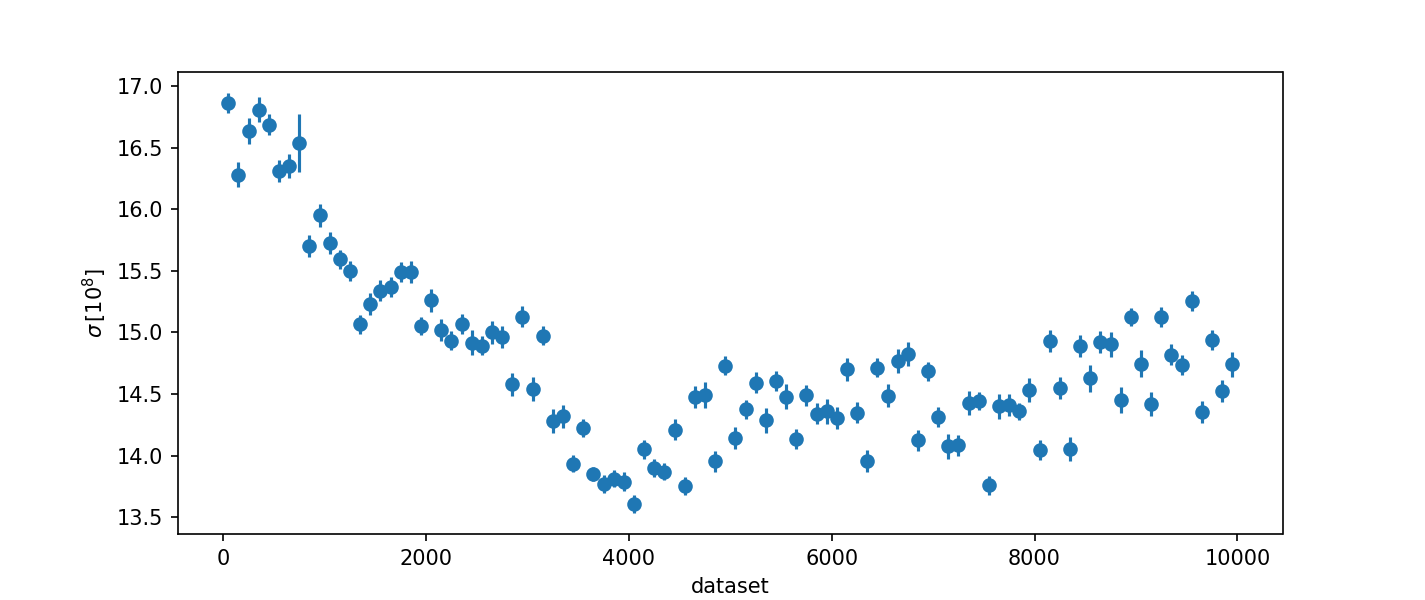

[Text(0, 0.5, '$\\sigma \\,[10^{8}]$'), Text(0.5, 0, 'dataset')]

In [102]:
sig_mean = [np.mean(sig_MLEs_As[i*100:(i+1)*100]) for i in range(100)]
sig_std = [np.std(sig_MLEs_As[i*100:(i+1)*100])/np.sqrt(100) for i in range(100)]

_, ax = plt.subplots(figsize=(9.5,4))
ax.errorbar(np.arange(0,10000,100)+50, sig_mean, yerr=sig_std, fmt='o')
ax.set(xlabel='dataset', ylabel=r'$\sigma \,[10^{8}]$')

<IPython.core.display.Javascript object>


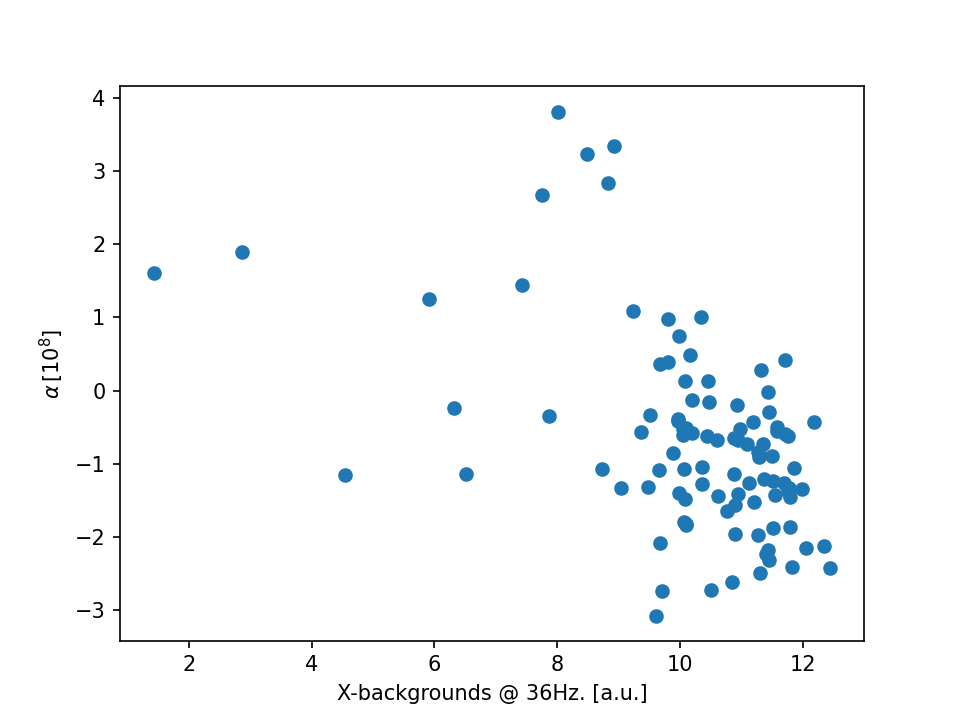

[Text(0, 0.5, '$\\alpha \\,[10^{8}]$'),
 Text(0.5, 0, 'X-backgrounds @ 36Hz. [a.u.]')]

In [117]:
_,ax = plt.subplots()
ax.scatter(sig36_mean_x*1e5, alphas_mean)
ax.set(xlabel=r'X-backgrounds @ 36Hz. [a.u.]', ylabel=r'$\alpha \,[10^{8}]$')

<IPython.core.display.Javascript object>


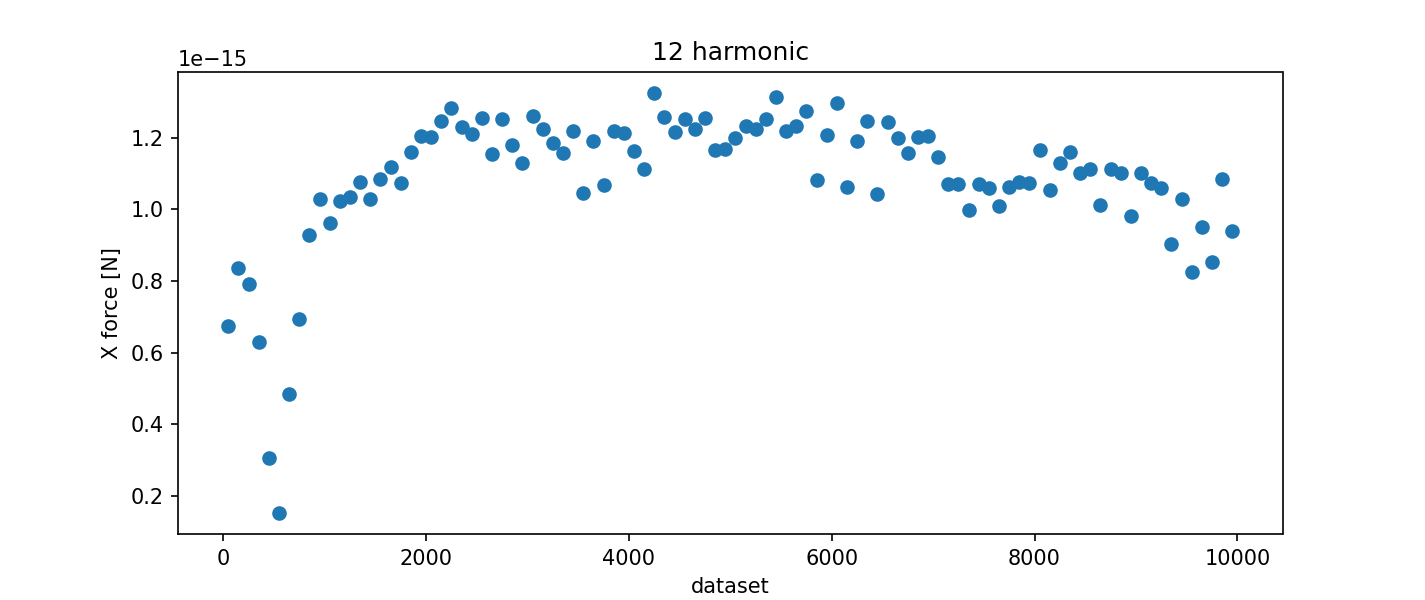

[Text(0, 0.5, 'X force [N]'),
 Text(0.5, 0, 'dataset'),
 Text(0.5, 1.0, '12 harmonic')]

In [132]:
sig35_mean = np.array([np.mean(std_35_all[i*100:(i+1)*100]) for i in range(100)])
sig35_std = np.array([np.std(std_35_all[i*100:(i+1)*100])/np.sqrt(100) for i in range(100)])

sig11_mean = np.array([np.mean(std_11_all[i*100:(i+1)*100]) for i in range(100)])
sig11_std = np.array([np.std(std_11_all[i*100:(i+1)*100])/np.sqrt(100) for i in range(100)])

sig36_mean = np.array([np.mean(std_36_all[i*100:(i+1)*100]) for i in range(100)])
sig36_std = np.array([np.std(std_36_all[i*100:(i+1)*100])/np.sqrt(100) for i in range(100)])

sig36_mean_x = np.array([np.mean(std_36_x[i*100:(i+1)*100]) for i in range(100)])
sig36_std_x = np.array([np.std(std_36_x[i*100:(i+1)*100])/np.sqrt(100) for i in range(100)])

_, ax = plt.subplots(figsize=(9.5,4))
# ax.errorbar(np.arange(0,10000,100)+50, sig35_mean, yerr=sig35_std, fmt='o')
# ax.errorbar(np.arange(0,10000,100)+50, sig36_mean, yerr=sig36_std, fmt='o')
ax.errorbar(np.arange(0,10000,100)+50, sig36_mean_x/sig36_mean_x[50]*1.2e-15, fmt='o')
# ax.errorbar(np.arange(0,10000,100)+50, sig11_mean, yerr=sig11_std, fmt='o')
ax.set(xlabel='dataset', ylabel=r'X force [N]', title='12 harmonic')

<IPython.core.display.Javascript object>


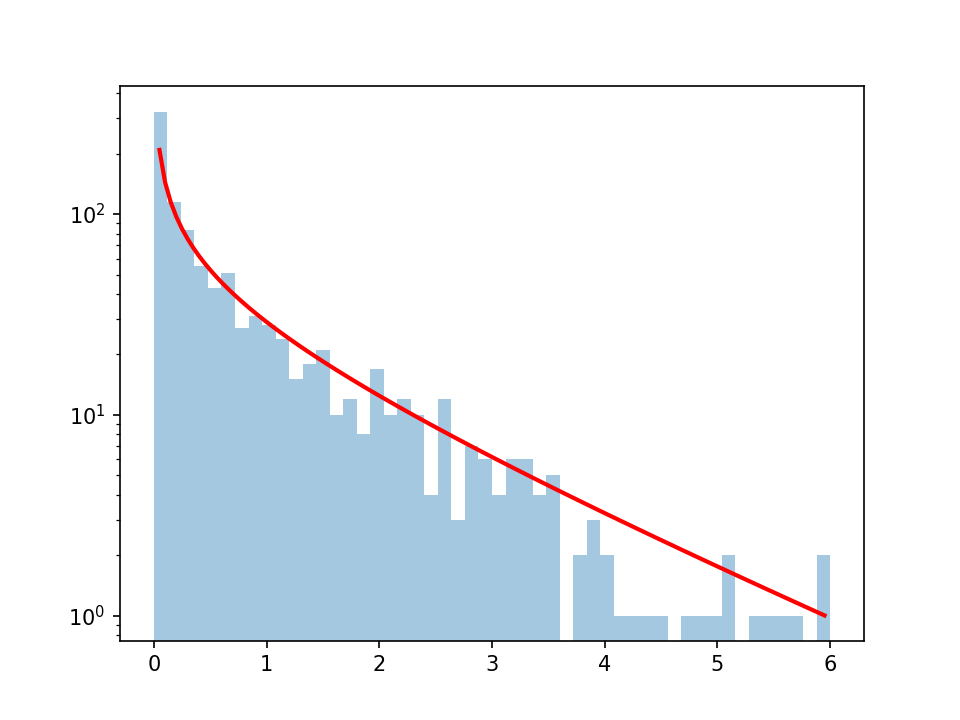

In [139]:
import scipy.stats as stats

logL = [2*(mm4_-mm5_)*10 for mm4_, mm5_ in zip(mm_fixed_A, mm_mle_A)]  ## original
logL2 = [2*(mm4_-mm5_)*10 for mm4_, mm5_ in zip(mm_fixed_A2, mm_mle_A2)] ## fixed sigma with noise array
logL3 = np.array([4*(mm4_-mm5_)/5000*10 for mm4_, mm5_ in zip(mm_fixed_A4, mm_mle_A4)])  ## with noise array
_,ax = plt.subplots()
# ax.hist(logL, bins=50, range=(0,6), alpha=1, log=False, label='no noise std')
# ax.hist(logL2, bins=50, range=(0,6), alpha=0.4, log=True, label='noise')
ax.hist(logL3, bins=50, range=(0,6), alpha=0.4, log=True, label='fixed sigma')
x = np.arange(0, 6, .05)
plt.plot(x, stats.chi2.pdf(x, df=1)*1000/50*6, color='r', lw=2, label='scaled chi square')
# ax.legend()
# ax.set(xlabel=r'-2*log($\lambda (\alpha_0 = 0)$)')

In [140]:
sum(np.array(logL3)>2.71)

69

In [78]:
## 1000 files of shaking data for nose floor
data_bdfs2 = load_dir(dirname='/data/new_trap/20200320/Bead1/Shaking/Shaking378/Shaking3
                         file_prefix='NoShaking_1', start_file=0, max_file=100)

6905  files in folder
1000  files loaded


In [14]:
noises = []
noises_std =[]
for freq_ in gravity_freqs:
    tmp_list = []
    for bb in data_bdfs2:
        tmp_list.append(np.std(bb.response_at_freq2('z', drive_freq=freq_, bandwidth=2)))
    noises.append(np.mean(tmp_list))
    noises_std.append(np.std(tmp_list))
noises = noises

In [15]:
noises_std = np.array(noises_std)**2

In [16]:
gravity_freqs, noises_std

(array([36, 33, 35, 23, 21, 39, 27, 24]),
 array([23.60388564, 28.85086848, 24.66149452, 79.11382193, 97.68585081,
        18.07442797, 43.37198697, 69.02584754]))

<IPython.core.display.Javascript object>


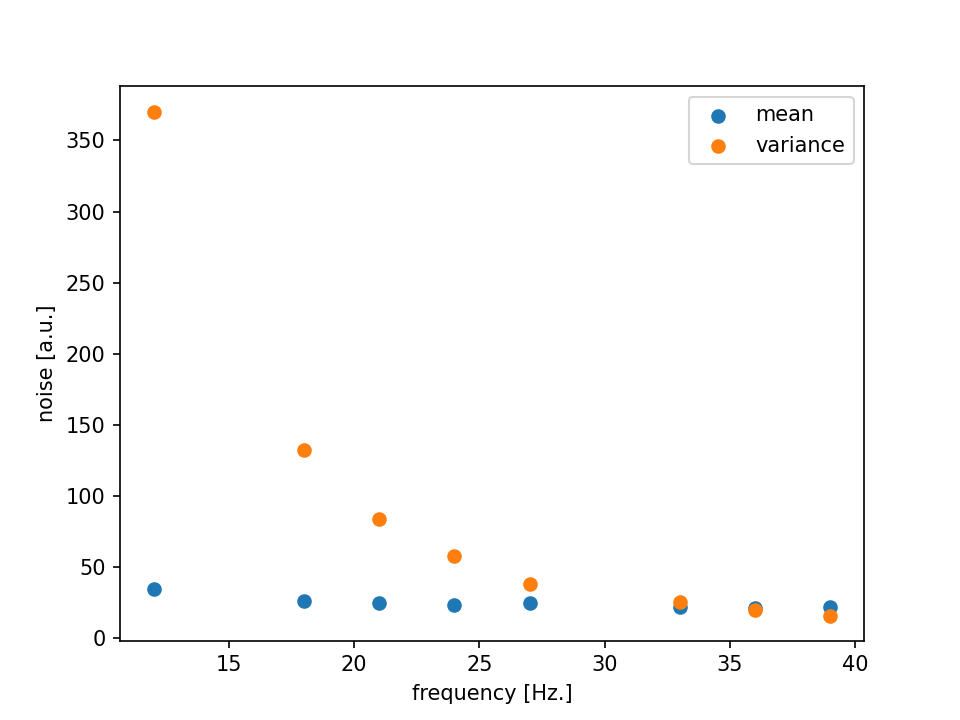

In [102]:

_,ax = plt.subplots()
ax.scatter(gravity_freqs, noises, label='mean')
ax.scatter(gravity_freqs, noises_std, label='variance')
ax.set(xlabel='frequency [Hz.]', ylabel='noise [a.u.]')
ax.legend()

In [154]:
from multiprocessing import Pool

# PLs12 = []
PLs_gravity4 = []

def calc_bdf(i):
# for i in range(0,10):
    print(i,'  ******************')
    fname = r'/data/new_trap/20200320/Bead1/Shaking/Shaking378/Shaking3_'+str(i)+'.h5'
    bb = BeadDataFile.BeadDataFile(fname=fname)
    fit_kwargs = {'A': 0, 'phi': 0.2, 'sigma':812,
                  'error_A': 1, 'error_phi': 0.5, 'errordef': 1, 'error_sigma': 10,
                  'limit_phi': [0, 2 * np.pi],
                  'limit_A': [-1000, 1000], 'limit_sigma': [0, 100000],
                  'print_level': 0, 'fix_A': False, 'fix_phi': True, 'fix_sigma': False}
    m1 = ll.find_mle_multiHarmoincs(x=bb.z2, template=shaking378_template, scales=gravity_scales, 
                                              signal_freqs=gravity_freqs, bandwidth=2, noises=noises_std/noises_std[0],
                                              decimate=10, **fit_kwargs)
#     print('MLEs: ', m1.values)
#     m1_MLEs.append(m1)
    A_array = np.arange(-3,3,0.1)
    PL_array = 2*10*ll.get_PL_multiHarmonics(A_array=A_array, **fit_kwargs)
    return PL_array
    
if __name__ == '__main__':
    pool = Pool(processes=15)                         # Create a multiprocessing Pool
    PLs_gravity4 = np.array(pool.map(calc_bdf, range(8000,9000)))  # process data_inputs iterable with pool
    pool.close()

8017   ******************
8000   ******************
8034   ******************
8051   ******************
8085   ******************
8136   ******************
8238   ******************
8068   ******************
8153   ******************
8102   ******************
8221   ******************
8119   ******************
8170   ******************
8187   ******************
8204   ******************
8001   ******************
8052   ******************
8018   ******************
8086   ******************
8205   ******************
8154   ******************
8222   ******************
8188   ******************
8239   ******************
8103   ******************
8171   ******************
8035   ******************
8120   ******************
8137   ******************
8069   ******************
8002   ******************
8087   ******************
8240   ******************
8019   ******************
8189   ******************
8206   ******************
8053   ******************
8155   ******************
8223   *****

8294   ******************
8478   ******************
8495   ******************
8445   ******************
8261   ******************
8345   ******************
8362   ******************
8395   ******************
8462   ******************
8411   ******************
8278   ******************
8295   ******************
8378   ******************
8328   ******************
8428   ******************
8479   ******************
8346   ******************
8363   ******************
8311   ******************
8446   ******************
8262   ******************
8412   ******************
8496   ******************
8379   ******************
8463   ******************
8396   ******************
8329   ******************
8279   ******************
8347   ******************
8296   ******************
8480   ******************
8364   ******************
8312   ******************
8429   ******************
8263   ******************
8413   ******************
8447   ******************
8380   ******************
8348   *****

8687   ******************
8653   ******************
8571   ******************
8719   ******************
8704   ******************
8753   ******************
8637   ******************
8521   ******************
8539   ******************
8620   ******************
8604   ******************
8555   ******************
8736   ******************
8588   ******************
8670   ******************
8654   ******************
8705   ******************
8688   ******************
8572   ******************
8522   ******************
8540   ******************
8720   ******************
8754   ******************
8638   ******************
8621   ******************
8556   ******************
8605   ******************
8671   ******************
8737   ******************
8706   ******************
8655   ******************
8689   ******************
8589   ******************
8573   ******************
8721   ******************
8755   ******************
8523   ******************
8541   ******************
8639   *****

8814   ******************
8929   ******************
8831   ******************
8781   ******************
8995   ******************
8863   ******************
8913   ******************
8978   ******************
8897   ******************
8880   ******************
8963   ******************
8947   ******************
8815   ******************
8930   ******************
8832   ******************
8914   ******************
8864   ******************
8996   ******************
8979   ******************
8881   ******************
8898   ******************
8948   ******************
8964   ******************
8915   ******************
8931   ******************
8980   ******************
8865   ******************
8997   ******************
8882   ******************
8899   ******************
8949   ******************
8965   ******************
8916   ******************
8998   ******************
8866   ******************
8981   ******************
8932   ******************
8900   ******************
8883   *****

<IPython.core.display.Javascript object>


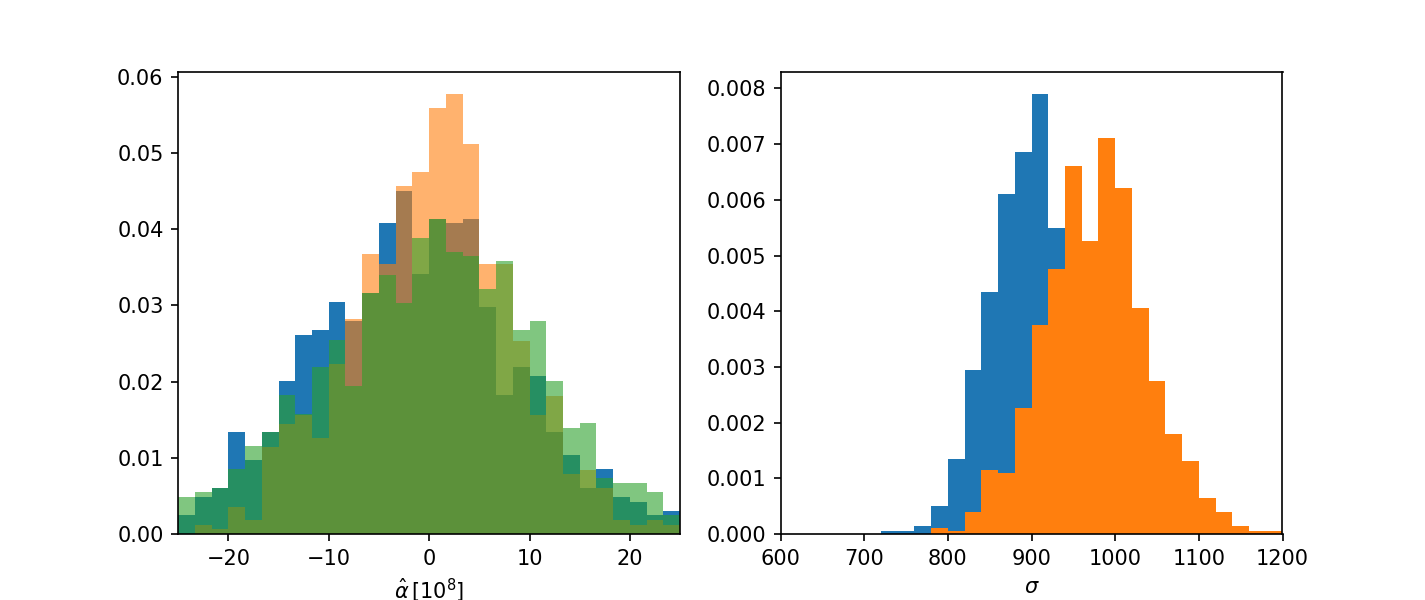

910.0256677475513 100.67172539595953
-1.6447024440806892 0.32177008606115504 -5.111421214488224 -1.0011622719583793


In [153]:
_,ax = plt.subplots(1,2,figsize=(9.5,4))

data = m1_MLEs4
avg = np.mean(data)
var = np.std(data)

alpha_range = (-25, 25)
ax[0].hist(data, range=alpha_range, bins=30, density=True)
ax[0].hist(m1_MLEs, range=alpha_range, bins=30, density=True, alpha = 0.6)
ax[0].hist(m1_MLEs3, range=alpha_range, bins=30, density=True, alpha = 0.6)
# ax[0].hist(data3, range=alpha_range, bins=30, density=True, alpha=0.4)
# ax[0].hist(data4, range=alpha_range, bins=30, density=True, alpha=0.4)
ax[0].set(xlim=alpha_range, xlabel=r'$\hat{\alpha} \,[10^{8}]$')

data_sig =  sig_MLEs2
avg_sig = np.mean(data_sig)
var_sig = np.var(data_sig)

sig_range = (600,1200)
ax[1].hist(data_sig, range=sig_range, bins=30, density=True)
ax[1].hist(sig_MLEs3, range=sig_range, bins=30, density=True)
ax[1].set(xlim=sig_range, xlabel=r'$\sigma$')
print(avg_sig, var_sig/np.sqrt(1000))
print(avg, var/np.sqrt(1000), avg/var*np.sqrt(1000), avg+2*var/np.sqrt(1000))

In [49]:
tmpPLs = np.array(PLs)
np.sum(tmpPLs, axis=0)

array([245851.79956086, 245851.54298987, 245852.31138291, 245854.10409365,
       245856.91664305, 245860.75172943, 245865.60967623, 245871.48829312,
       245878.38501234, 245886.29965169, 245895.23274899, 245905.17677155,
       245916.13628784, 245928.10673851, 245941.09069135, 245955.0786935 ,
       245970.07186549, 245986.06417964, 246003.05515833, 246021.04348042,
       246040.01885569, 246059.98504607, 246080.935793  , 246102.86682419,
       246125.77161075, 246149.65490925, 246174.50593443, 246200.31991874,
       246227.0946889 , 246254.82130693, 246283.49873882, 246313.11809558,
       246343.67847707, 246375.17110786, 246407.58917469, 246440.93255787,
       246475.19654562, 246510.36675703, 246546.43467165, 246583.40970943])

<IPython.core.display.Javascript object>


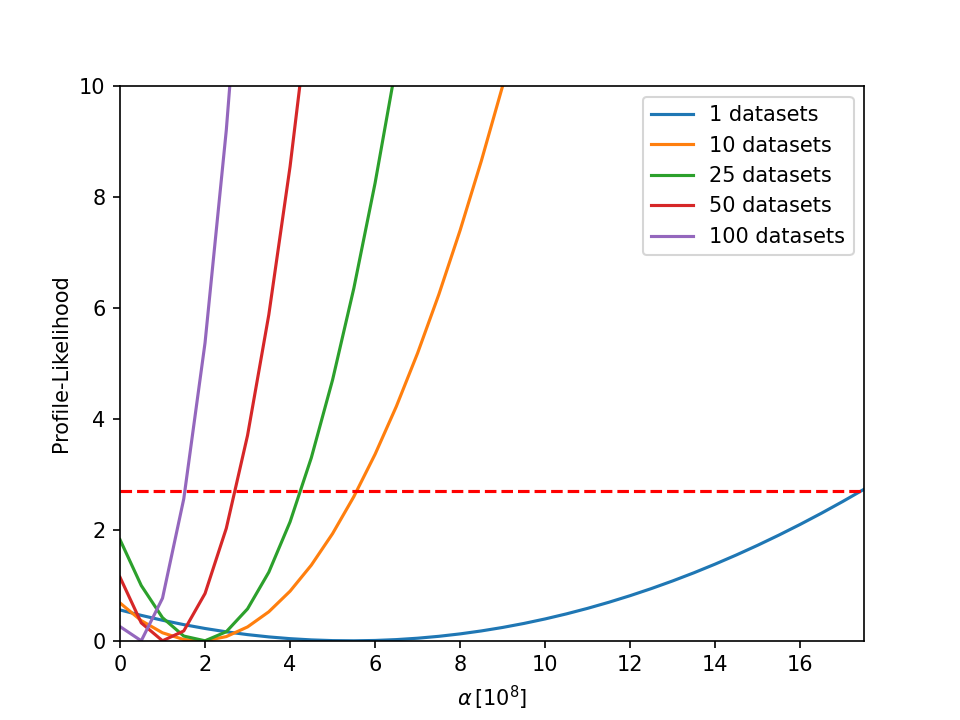

[(0.0, 10.0),
 Text(0, 0.5, 'Profile-Likelihood'),
 (0.0, 17.5),
 Text(0.5, 0, '$\\alpha \\, [10^{8}]$')]

In [52]:
_,ax = plt.subplots()
for i in [1, 10, 25, 50, 100]:
    tt = np.sum(tmpPLs[:i], axis=0)
    ttmin = np.min(tt)
    ax.plot(A_array, tt-ttmin, label=str(i)+' datasets')
ax.legend()
ax.plot(A_array, PL_array*0 + 2.71, 'r--')
ax.set(ylim=(0,10), xlim=(0.0,17.5), xlabel=r'$\alpha \, [10^{8}]$', ylabel = 'Profile-Likelihood')

In [43]:
tmpPLs3 = np.array(PLs6+PLs5+PLs4+PLs3+PLs7)

In [32]:
N = 0
PLs_tmp = []
for i,PP in enumerate(PLs3):
    if np.std(PP)>0.5:
        print(np.std(PP), i)
        N +=1
    else:
        PLs_tmp.append(PP)
tmpPLs3 = np.array(PLs_tmp)

In [52]:
tmpPLs3 = np.array(list(PLs4)+list(PLs3)+list(PLs5)+list(PLs6)+list(PLs7))

<IPython.core.display.Javascript object>


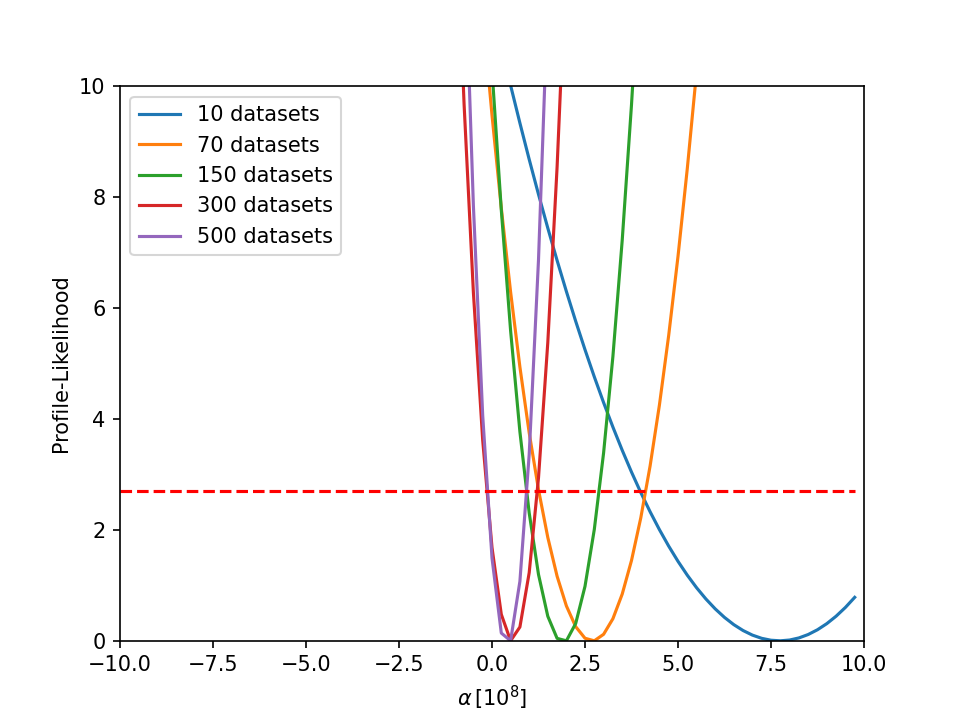

[(0.0, 10.0),
 Text(0, 0.5, 'Profile-Likelihood'),
 (-10.0, 10.0),
 Text(0.5, 0, '$\\alpha \\, [10^{8}]$')]

In [54]:
A_array = np.arange(-10,10,0.25)

_,ax = plt.subplots()
for i in [10, 70, 150, 300, 500]:
    tt = np.sum(tmpPLs3[:i], axis=0)
    ttmin = np.min(tt)
    ax.plot(A_array, tt-ttmin, label=str(i)+' datasets')
ax.legend()
ax.plot(A_array, tt*0 + 2.71, 'r--')
ax.set(ylim=(0,10), xlim=(-10,10), xlabel=r'$\alpha \, [10^{8}]$', ylabel = 'Profile-Likelihood')

<IPython.core.display.Javascript object>


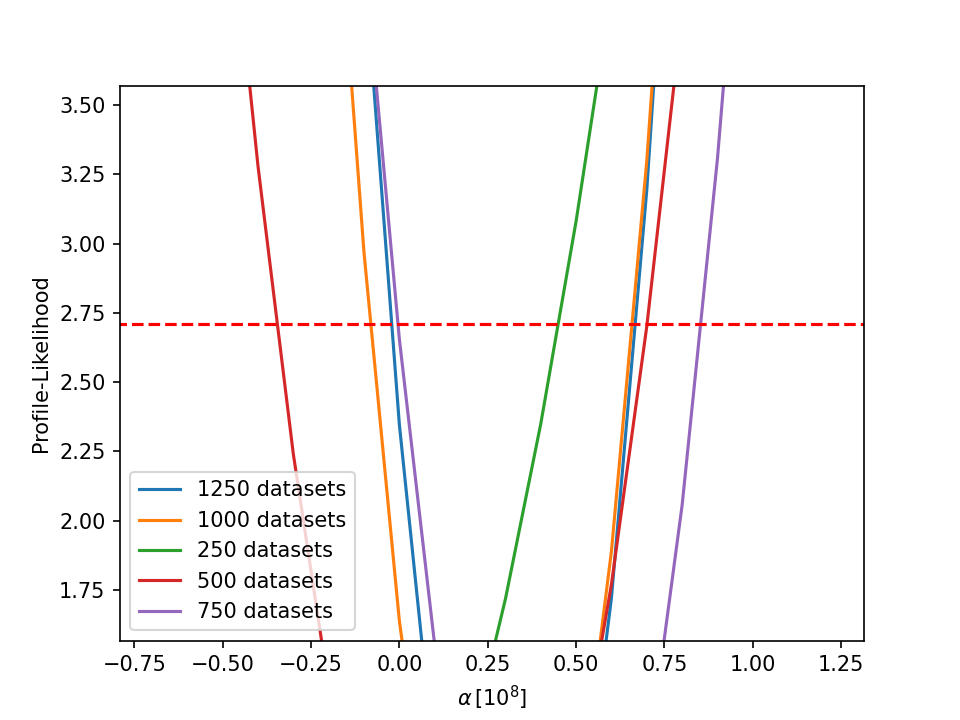

[(0.0, 10.0),
 Text(0, 0.5, 'Profile-Likelihood'),
 (-3.0, 3.0),
 Text(0.5, 0, '$\\alpha \\, [10^{8}]$')]

In [159]:
A_array = np.arange(-3,3,0.1)
tmpPLs8 = np.array(list(PLs9)+list(PLs8)+list(PLs10)+list(PLs11)+list(PLs12))
_,ax = plt.subplots()
for i in [1250, 1000, 250, 500, 750]:
    tt = np.sum(tmpPLs8[:i], axis=0)
    ttmin = np.min(tt)
    ax.plot(A_array, tt-ttmin, label=str(i)+' datasets')
ax.legend()
ax.plot(A_array, tt*0 + 2.71, 'r--')
ax.set(ylim=(0,10), xlim=(-3,3), xlabel=r'$\alpha \, [10^{8}]$', ylabel = 'Profile-Likelihood')

In [192]:
tt1 = np.sum(tmpPLs8[:1000], axis=0)
tt1 -= np.min(tt1)
tt2 = tt1[34:]
tt3 = tt1[:34]
A_array2 = np.arange(-3,3,0.1)[34:]
A_array3 = np.arange(-3,3,0.1)[:34]
np.interp(2.71, tt2, A_array2), np.interp(0.32, A_array3, tt3)
# _,ax = plt.subplots()
# ax.plot( tt3, A_array3)
# (0.66+0.08)/2

(0.6582062070651242, 0.0)

<IPython.core.display.Javascript object>


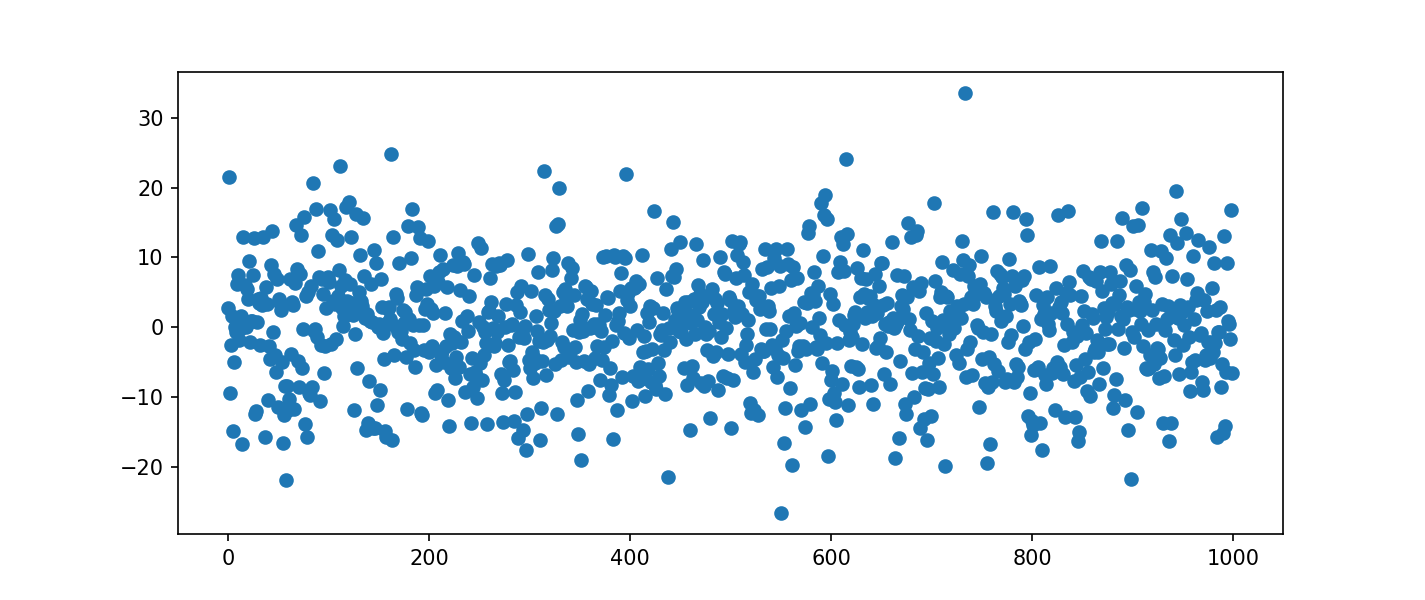

In [94]:
_,ax = plt.subplots(figsize=(9.5,4))
ax.scatter(range(1000), m1_MLEs)

<IPython.core.display.Javascript object>


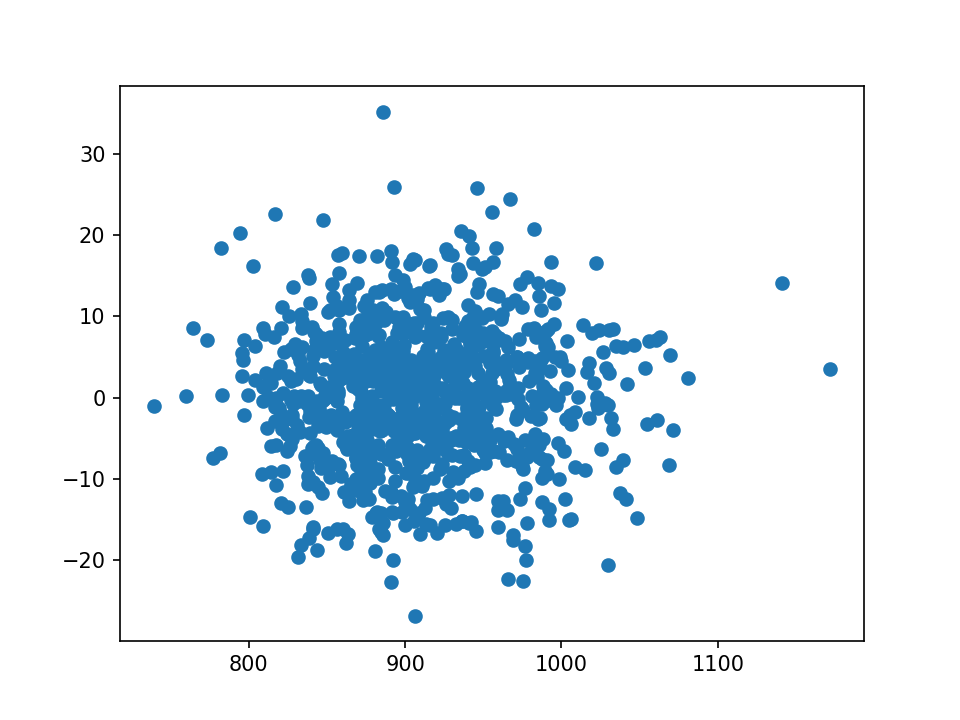

In [117]:
_,ax = plt.subplots()
ax.scatter(sig_MLEs2, m1_MLEs2)

<IPython.core.display.Javascript object>


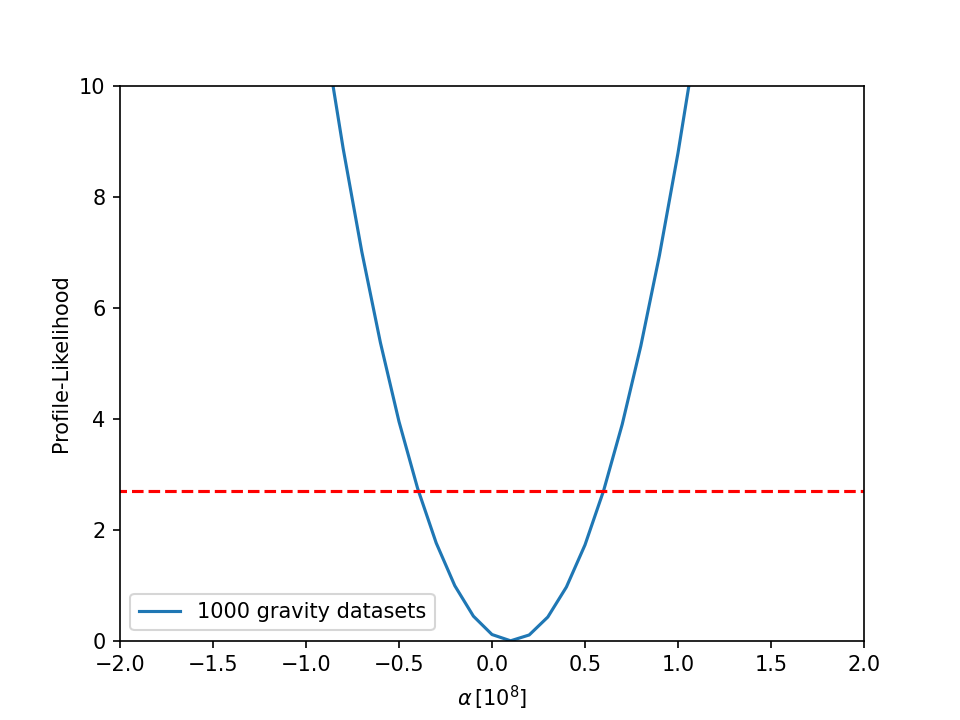

[(0.0, 10.0),
 Text(0, 0.5, 'Profile-Likelihood'),
 (-2.0, 2.0),
 Text(0.5, 0, '$\\alpha \\, [10^{8}]$')]

In [191]:
A_array = np.arange(-3,3,0.1)
tt = np.sum(PLs_gravity, axis=0)
ttmin = np.min(tt)

_,ax = plt.subplots()
ax.plot(A_array, tt-ttmin, label='1000 gravity datasets')
ax.legend()
ax.plot(A_array, tt*0 + 2.71, 'r--')
ax.set(ylim=(0,10), xlim=(-2,2), xlabel=r'$\alpha \, [10^{8}]$', ylabel = 'Profile-Likelihood')

In [34]:
def getPhase_scanY(i):
    print(i,'  ******************')
    fname = r'/data/new_trap/20200320/Bead1/Shaking/Shaking378/Shaking3_'+str(i)+'.h5'
    bb = BeadDataFile.BeadDataFile(fname=fname)
    x = bb.x2
    fft_ = np.fft.rfft(x,norm='ortho')
    freq_ = np.fft.rfftfreq(len(x), d=1./5000)
    return [np.angle(fft_[freq_==harm*3]) for harm in range(1,14)]

In [35]:
test_phase = np.array(Parallel(n_jobs=20)(delayed(getPhase_scanY)(i) for i in tqdm(range(10000)))).T[0]


 58%|█████▊    | 5820/10000 [01:48<00:56, 74.02it/s]


100%|██████████| 10000/10000 [02:26<00:00, 68.49it/s]

In [36]:
## force template
dist = 11.4
z_sep = -15.85
y_offset = 4.9
test = force_vs_time(dist*1e-6,z_sep*1e-6,200e-6,3,"z",10e-6, yuk_or_grav="yuk",offset_y=y_offset*1e-6, 
                     alpha=1e8, bead_size=3.8e-6)

def fft_norm(N, fsamp):
    "Factor to normalize FFT to ASD units"
    return np.sqrt(2 / (N * fsamp))
scale = np.sqrt(2)*fft_norm(5000, 5000)

_,ax = plt.subplots()
x = test[1]
# x2 = test2[1]
fft = np.abs(np.fft.rfft(x))*scale*1.85/1.55
freq = np.fft.rfftfreq(len(x), d=1./5000)
angles = np.angle(np.fft.rfft(x))
phases_th = [angles[freq==freq_] for freq_ in 3*np.arange(14)]
# fft2 = np.abs(np.fft.rfft(x2))*scale
ax.semilogy(freq, fft, label='7.6 $\mu m$ sphere - Z force')
# ax.semilogy(freq, fft2, label='7.6 $\mu m$ sphere - Z force', alpha=0.5)
ax.set(xlim=(1,100), ylim=(None,None), xlabel='frequency [Hz]', ylabel='Force [N]', title=r'$\alpha=1x10^{8}$')
ax.legend()
print('Z force [N] at 36Hz.:', fft[freq==36])
print('sensitivity [alpha]:', 1e-17/fft[freq==36]*1e8)

Your choice of separation or height is not existing
Taking 3.8e-06 for bead_size
Taking 1.2e-05 for separation
Taking -1.5e-05 for height
order
A bead size of 3.80e-06 is selected
3.8e-06
3.8e-06
A bead size of 3.80e-06 is selected
3.8e-06
posvec
A bead size of 3.80e-06 is selected
3.8e-06
A separation of 1.15e-05 is selected
A height of -1.50e-05 is selected


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Z force [N] at 36Hz.: [2.95979819e-18]
sensitivity [alpha]: [3.37860873e+08]


In [17]:
np.mean(test_phase[0])

0.06889255404736429

In [37]:
fig, ax = plt.subplots(3,4,figsize=(9,8.5), sharex=True)
i = 0
_ = [a.hist(test_phase[j][:3000], label=str(np.arange(1,13)[j]*3)+'Hz.', density=True, bins=60, range=(-np.pi,np.pi)) for j,a in enumerate(ax.flatten())]
# _ = [a.hist(test_phase2[j][:3000]%(2*np.pi), label=str(np.arange(1,13)[j]*3)+'Hz. no spin', alpha=0.5, bins=60, range=(0,2*np.pi)) for j,a in enumerate(ax.flatten())]
# _ = ax.hist(test_phase2[i][:3000]%(2*np.pi), label=str(np.arange(1,13)[i]*3)+' constant', alpha=0.6, bins=60, range=(0,2*np.pi))
_ = [a.legend() for a in ax.flatten()]
_ = [a.axvline(phases_th[j], color='r', linestyle='dashed', linewidth=3) for j,a in enumerate(ax.flatten())]
_ = [a.set(xlabel='phase [rad]') for a in ax[2][:].flatten()]
_ = [a.set(ylabel='[a.u.]') for a in ax.flatten()[::4]]

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [151]:
import numpy as np
import matplotlib.pyplot as plt

def multiple_formatter(denominator=2, number=np.pi, latex='\pi'):
    def gcd(a, b):
        while b:
            a, b = b, a%b
        return a
    def _multiple_formatter(x, pos):
        den = denominator
        num = np.int(np.rint(den*x/number))
        com = gcd(num,den)
        (num,den) = (int(num/com),int(den/com))
        if den==1:
            if num==0:
                return r'$0$'
            if num==1:
                return r'$%s$'%latex
            elif num==-1:
                return r'$-%s$'%latex
            else:
                return r'$%s%s$'%(num,latex)
        else:
            if num==1:
                return r'$\frac{%s}{%s}$'%(latex,den)
            elif num==-1:
                return r'$\frac{-%s}{%s}$'%(latex,den)
            else:
                return r'$\frac{%s%s}{%s}$'%(num,latex,den)
    return _multiple_formatter

class Multiple:
    def __init__(self, denominator=2, number=np.pi, latex='\pi'):
        self.denominator = denominator
        self.number = number
        self.latex = latex

    def locator(self):
        return plt.MultipleLocator(self.number / self.denominator)

    def formatter(self):
        return plt.FuncFormatter(multiple_formatter(self.denominator, self.number, self.latex))

In [166]:
fig2, ax = plt.subplots(1,4,figsize=(13,3), sharey=True)
jj = [5,7,10,11]
_ = [a.hist(test_phase[j]-0.16, density=False, bins=60, range=(-np.pi,np.pi)) for a,j in zip(ax,jj)]

_ = [a.axvline(phases_th[j], color='r', linestyle='dashed', linewidth=3) for j,a in zip(jj,ax)]
# _ = [a.legend() for a in ax.flatten()]
_ = [a.set(xlabel='phase [rad]', title=str(np.arange(1,13)[j]*3)+'Hz.') for a,j in zip(ax,jj)]
ax[0].set(ylabel='[a.u.]')
for a in ax:
    a.grid(True)
    a.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
    a.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 12))
    a.xaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))
plt.show()

fig2.savefig("wilson_phases.pdf", bbox_inches='tight')


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …